## Part I

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import cmath
import statistics
import math
import time
import bisect

(55, 55)


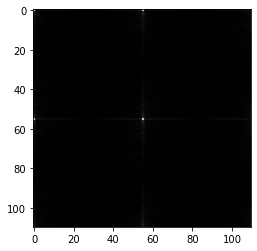

In [3]:
def dft2(img,M,N):
    img2=np.zeros((2*M,2*N),dtype=complex)
    img2[0:M,0:N]=np.copy(img)
    img=np.copy(img2)
    mask=np.empty(img.shape,dtype=complex)
    mask2=np.copy(mask)
    img=np.asarray(img,dtype=complex)
    pi=math.pi
    for m in range(img.shape[0]):
        for n in range(img.shape[1]):
            img=img*(-1)**(m+n)
            mask[m][n]=cmath.exp((-1j*2*pi*m)/M)
            mask2[m][n]=cmath.exp((-1j*2*pi*n)/N)
    for m in range(img.shape[0]):
        for n in range(img.shape[1]):
            temp=(mask**m) * (mask2**n)
            img2[m][n]=np.sum(np.multiply(img,temp))
    return img2
img=cv2.imread('../images/mountain.jpg',0)
img=cv2.resize(img,(55,55))
print(img.shape)
M, N = img.shape 
res=dft2(img,M,N)
plt.imshow(np.abs(res),cmap='gray')

## 5.1
-  Implemented 2d dft in O(n^4) way brute force

## Part II

In [4]:
import numpy as np
def fft1d(x):
    n = x.shape[1]
    if n==1:
        return x
    if n % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    ko = np.arange(n)
    ko = ko.reshape(1,-1)
    Q = (np.e**(-((1j)*(2*np.pi)*(ko[:,:int(n/2)]))/(n)))
    Feven = fft1d(x[ko%2==0].reshape(1,-1))
    Fodd = fft1d(x[ko%2==1].reshape(1,-1))
    return np.concatenate([Feven+(Q*Fodd),Feven-(Q*Fodd)],axis=1)

x = np.array([4,4])
print(fft1d(x.reshape(1,-1)))
print(np.fft.fft(x))

[[8.+0.j 0.+0.j]]
[8.+0.j 0.+0.j]


In [5]:
def fft2d(x):
    temp = np.zeros(x.shape,dtype=np.complex_)
    res = np.zeros(x.shape,dtype=np.complex_)
    for i in range(x.shape[0]):
        temp[i,:] = fft1d(x[i,:].reshape(1,-1))
    for i in range(x.shape[1]):
        res[:,i] = fft1d(temp[:,i].reshape(1,-1))
    return res
x = np.array([[1,2,3,4],[1,2,3,4]])
print(fft2d(x))
print(np.fft.fft2(x))

[[20.+0.j -4.+4.j -4.+0.j -4.-4.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]]
[[20.+0.j -4.+4.j -4.+0.j -4.-4.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]]


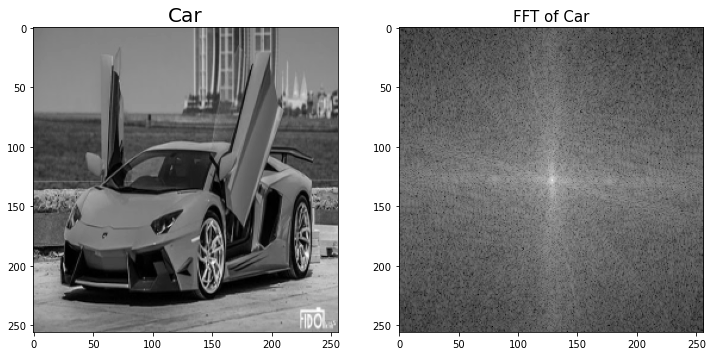

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
lena1 = cv2.imread("../images/car1.jpg",0)
car=cv2.resize(lena1,(256,256)) 
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Car",fontsize=20)
plt.imshow(car,cmap="gray")
lena_f = fft2d(car)
plt.subplot(1,2,2)
plt.title("FFT of Car",fontsize=15)
plt.imshow(np.log(1+np.absolute(np.fft.fftshift(lena_f))),cmap="gray")
plt.show()


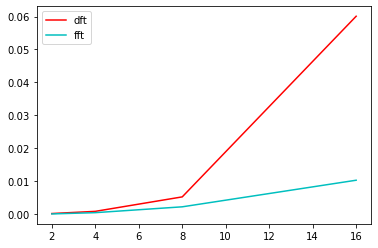

In [7]:
my=['g','b','r','y','m','c','k']
me=['--g','--b','--r','--y','--m','--c','--k']
def dftvsfft():
    img1=cv2.imread('../images/car1.jpg',0)
    img=cv2.resize(img1,(64,64)) 
    given=2
    arr=[]
    brr=[]
    for k in range(1,5):
        a=2**(k)
        b=2**(k)
        img=cv2.resize(img,(a,b))
        st=time.time()
        M,N=img.shape
        img2=dft2(img,M,N)
        en=time.time()
        arr.append(en-st)
        brr.append(a)
    plt.plot(brr,arr,'r',label='dft')
    plt.legend()
    arr=[]
    brr=[]
    for k in range(1,5):
        a=2**(k)
        b=2**(k)
        img=cv2.resize(img,(a,b))
        st=time.time()
        img2=fft2d(img)
        en=time.time()
        arr.append(en-st)
        brr.append(a)
    plt.plot(brr,arr,'c',label='fft')
    plt.legend()
    arr=[]
    brr=[]
dftvsfft()

## 5.2
 - implemented 2d fft using 1d which is implemented by recursion in O(nlogn) and 2d is done by taking fft for all rows and then for all columns of the fft image 

In [8]:
def fft1(signal):
    if len(signal) == 1:
        Combined_Result=np.copy(signal)
    elif(len(signal)%2==1):
        print("error the fft given is false please pad the image")
    else:
        pi=math.pi
        Even=fft1([signal[2*i] for i in range(math.floor(len(signal)/2))])
        Odd=fft1([signal[2*i+1] for i in range(math.floor(len(signal)/2))])
        Combined_Result = np.zeros(len(signal),dtype=complex)
        for h in range(math.floor(len(signal)/2)):
            Combined_Result[h]=Even[h]+((np.exp((2.0*pi*1j*(-h))/len(signal)))*Odd[h])
            Combined_Result[h+math.floor(len(signal)/2)]=Even[h]-((np.exp((2.0*pi*1j*(-h))/len(signal)))*Odd[h])
    return Combined_Result
def ifft1d(signal):
    signal=np.real(signal)+(-1j)*np.real(-1j*signal)#taking conjugate
    signal=fft1(signal)/(len(signal))
    return np.real(signal)+(-1j)*np.real(-1j*signal)#taking conjugate again
def ifft2d(img):
    img=np.array(img,dtype=complex)
    img2=np.array(img,dtype=complex)
    for i in range(img.shape[0]):
        img2[i]=ifft1d(img[i])
    img2=img2.T
    for i in range(img.shape[1]):
        img2[i]=ifft1d(img2[i])
    return img2.T

In [9]:

car_i_if = ifft2d(car)

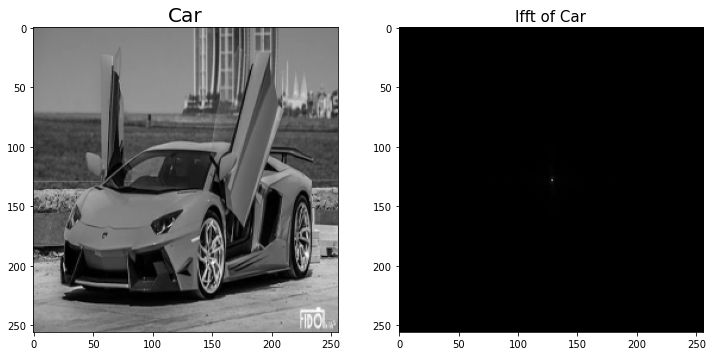

In [10]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Car",fontsize=20)
plt.imshow(car,cmap="gray")
lena_f = fft2d(car)
plt.subplot(1,2,2)
plt.title("Ifft of Car",fontsize=15)
plt.imshow(np.abs(np.fft.fftshift(car_i_if)),cmap="gray")
plt.show()
def visualisation_fft2d(img):
    M,N=img.shape
    img2=np.zeros((M,N),dtype=complex)
    img2[0:M,0:N]=np.copy(img)
    img=np.copy(img2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i,j]=img[i,j]*((-1)**(i+j))
    return fft2d(img)

## 5.3
- implemented ifft 2d with the same logic t=with 1d ifft which is inturn implemented as the conjugate(fft(conjugate(signal)))

In [11]:
car_f=fft2d(car)
car_f_f=fft2d(car_f)

car_f_cf=fft2d(np.conjugate(car_f))

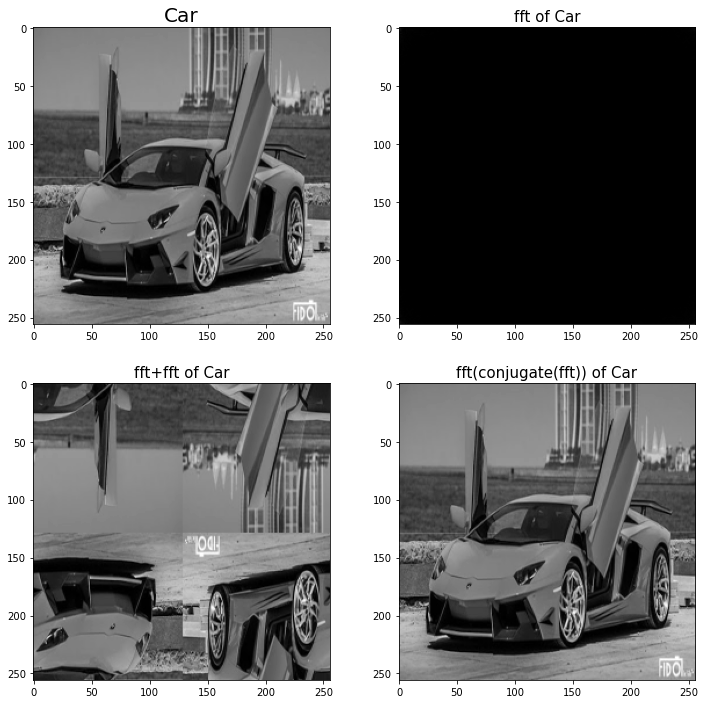

In [12]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Car",fontsize=20)
plt.imshow(car,cmap="gray")
lena_f = fft2d(car)
plt.subplot(2,2,2)

plt.title("fft of Car",fontsize=15)
plt.imshow(np.abs(lena_f),cmap="gray")
plt.subplot(2,2,3)

plt.title("fft+fft of Car",fontsize=15)
plt.imshow(np.abs(np.fft.fftshift(car_f_f)),cmap="gray")
plt.subplot(2,2,4)
plt.title("fft(conjugate(fft)) of Car",fontsize=15)
plt.imshow(np.abs(car_f_cf),cmap="gray")

plt.show()

## 5.4 
- fft of fft is basically the flipped matrix of orignal matrix to retrieve original in spatial we can just flip the matrix and in frequency domain we have to pass the conjugate of the matrix to fft since ifft is itself the fft of conjugate of signal

# Q6

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def convolvewithpad(img1,img2):
    N,M=img1.shape
    img3=np.zeros((3*N-2,3*M-2))
    img3[N-1:(2*N)-1,M-1:(2*M)-1]=img1
    img2=np.flip(img2)
    return convolve_new(img3,img2)
def convolve_new(img,mask):
    #print(img.shape)
    img=img.astype(float)
    k1,k2=mask.shape
    img2=np.ones((img.shape[0]-k1+1,img.shape[1]-k2+1))
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            sum_me=np.multiply(img[i:i+k1,j:j+k2],mask)
            sum_me=(np.sum(sum_me))
            img2[i][j]=(sum_me)
    return img2
def finderror(img1,img2):
    sum_me=0
    img3=img1-img2
    sum_me=np.sum(img3**2)
    return sum_me/(img.shape[0]*img.shape[1])

average error is :
2.636379538854515e+18


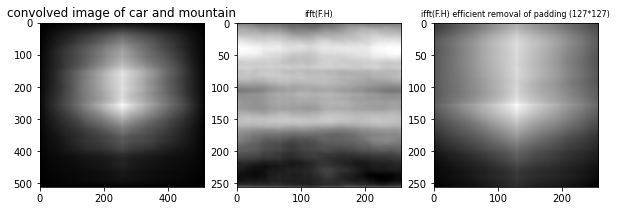

In [14]:
img1=cv2.imread('../images/mountain.jpg',0)
img2=cv2.imread('../images/car.jpg',0)
img1=cv2.resize(img1,(256,256))
img2=cv2.resize(img2,(256,256))
plt.figure(figsize=[10,10])
plt.subplot(131)
plt.title('convolved image of car and mountain')
img3=convolvewithpad(img1,img2)
plt.imshow(img3,cmap='gray')
plt.subplot(132)
plt.title('ifft(F.H)',fontsize=8)
img4=np.abs(ifft2d(np.multiply(fft2d(img1),fft2d(img2))))
plt.imshow(img4,cmap='gray')
plt.subplot(133)
plt.title('ifft(F.H) efficient removal of padding (127*127)',fontsize=8)
plt.imshow(img3[127:383,127:383],cmap='gray')
print("average error is :")
print(finderror(img3[127:383,127:383],img4))


average error is :
3.251314516475743e+18


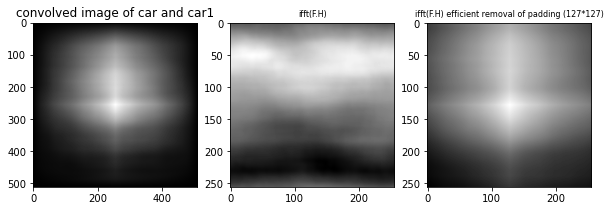

In [15]:
img1=cv2.imread('../images/car.jpg',0)
img2=cv2.imread('../images/car1.jpg',0)
img1=cv2.resize(img1,(256,256))
img2=cv2.resize(img2,(256,256))
plt.figure(figsize=[10,10])
plt.subplot(131)
plt.title('convolved image of car and car1')
img3=convolvewithpad(img1,img2)
plt.imshow(img3,cmap='gray')
plt.subplot(132)
plt.title('ifft(F.H)',fontsize=8)
img4=np.abs(ifft2d(np.multiply(fft2d(img1),fft2d(img2))))
plt.imshow(img4,cmap='gray')
plt.subplot(133)
plt.title('ifft(F.H) efficient removal of padding (127*127)',fontsize=8)
plt.imshow(img3[127:383,127:383],cmap='gray')
print("average error is :")
print(finderror(img3[127:383,127:383],img4))

## 6.1 
- implemened convolution of 2 images including padding and calculated the ifft(fft(f).fft(h)),  they should give the same image theoretically but they are not with the average eroor of range 10^17

In [16]:
def padtheimage(img):
    m,n=img.shape
    img2=np.zeros((2*m,2*n))
    img2[0:m,0:n]=img
    return img2

In [17]:
#6.2 implemented fo 2 sets of images(bell, mountain) and (lena,cameraman)
img1=cv2.imread('../images/bell.jpg',0)
img2=cv2.imread('../images/car.jpg',0)

img1=cv2.resize(img1,(256,256))
img2=cv2.resize(img2,(256,256))




average error is :
5.155889041078733e-13


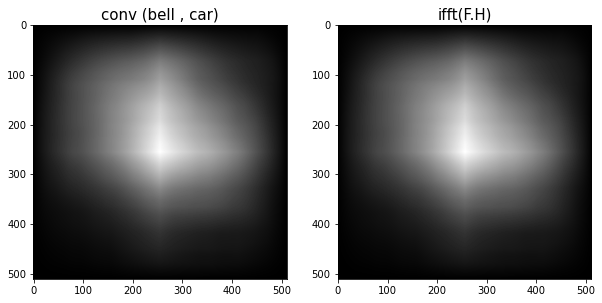

In [18]:
plt.figure(figsize=[10,10])
plt.subplot(121)
plt.title('conv (bell , car)',fontsize=15)
img3=convolvewithpad(img1,img2)
plt.imshow(img3,cmap='gray')

plt.subplot(122)
plt.title('ifft(F.H)',fontsize=15)
img1=padtheimage(img1)
img2=padtheimage(img2)
img4=np.abs(ifft2d(np.multiply(fft2d(img1),fft2d(img2))))[0:511,0:511]
plt.imshow(img4,cmap='gray')

print("average error is :")
print(finderror(img3,img4))

KeyboardInterrupt: 

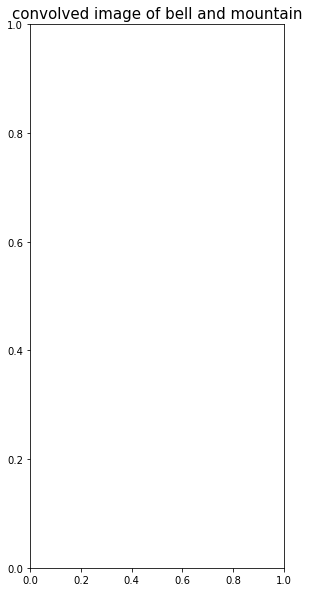

In [19]:
img1=cv2.imread('../images/bell.jpg',0)
img2=cv2.imread('../images/mountain.jpg',0)

img1=cv2.resize(img1,(256,256))
img2=cv2.resize(img2,(256,256))

plt.figure(figsize=[10,10])
plt.subplot(121)
plt.title('convolved image of bell and mountain',fontsize=15)
img3=convolvewithpad(img1,img2)
plt.imshow(img3,cmap='gray')

plt.subplot(122)
img1=padtheimage(img1)
img2=padtheimage(img2)
plt.title('ifft(F.H)',fontsize=8)
img4=np.abs(ifft2d(np.multiply(fft2d(img1),fft2d(img2))))[0:511,0:511]
plt.imshow(img4,cmap='gray')
print("average error is :")
print(finderror(img3,img4))

 ## 6.2 
 - After padding the image with 0s and making the image of 512*512 now the new error almost      became "0" (~1e-15) so the padding is the main problem in the 1st case now this is resolved and  the outputs are same now

# Q7

In [20]:
def lowpass_notch(rad,img):
    mask=np.empty(img.shape)
    m,n=img.shape
    m=m//2
    n=n//2
    img=np.array(img,complex)
    mask[:,:] = 1
    mask[m-1:m+1,n+1:] = 0
    mask[m-1:m+1,:n-1] = 0
    mask[m+1:,n-1:n+1] = 0
    mask[:m-1,n-1:n+1] = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if( ((m-i)**2 + (n-j)**2)>rad**2):
                mask[i,j]=0
    M,N=img.shape
    img2=np.zeros((M,N),dtype=complex)
    img2[0:M,0:N]=np.copy(img)
    img=np.copy(img2)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i,j]=img[i,j]*((-1)**(i+j))
    img=fft2d(img)   
    img=np.multiply(img,mask)
    plt.imshow((255/8)*np.log(1+np.abs(mask)),cmap='gray')
    img=ifft2d(img)
    return np.abs(img)
def median_optimal(img,k1):
    img2=np.ones((img.shape[0]-k1+1,img.shape[1]-k1+1))   
    for i in range(img2.shape[0]):
        for j in range (img2.shape[1]):
            if(j==0):
                temp=img[i:i+k1,0:k1]
                temp=np.transpose(temp).flatten().tolist()
                img2[i][j]=statistics.median(temp)
            else :
                me=img[i:i+k1,j+k1-1:j+k1].flatten().tolist()
                del temp[0:k1]
                temp.extend(me)
                img2[i][j]=statistics.median(temp)
    return img2
def convolve(img,k1,mask):
    print(img.shape)
    img=img.astype(float)
    img2=np.ones((img.shape[0]-k1+1,img.shape[1]-k1+1))
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            sum_me=np.multiply(img[i:i+k1,j:j+k1],mask)
            sum_me=(np.sum(sum_me))
            img2[i][j]=(sum_me)
    return img2

In [ ]:
img=cv2.imread('../images/noisy_lena.png',0)
img=cv2.resize(img,(512,512))
img=lowpass_notch(60,img)
img=convolve(img,3,np.array([[-7,-7,-7],[-7,80,-7],[-7,-7,-7]]))
img=median_optimal(img,3)
plt.imshow(img,'gray')


 -  implemented shifted fft(visualsied)
 -  implemented low pass including notch on fft 
 -  made ifft for image here i havent shifted the image again because the shift in spatial domain is      -1^(i+j) and here we are considering the abs so it is not considered 
 - Median blurred the image with window size 3